# Breast Cancer Proteomics Analysis Portfolio Project

Hi! I am so glad you are interested in my example portfolio project.<br>

For this analysis, I investigated a publicly available proteomics data set to illustrate my bioinformatics skills.

If these skills are a good fit for a position at your company, please email me at alanalrister@gmail.com. I am very excited to hear from you.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd

# Publicly Available iTRAQ Proteomics Data

Data available from: https://www.nature.com/articles/nature18003

This data set consists of iTRAQ proteomics analysis of breast cancer from 77 patients.

In [2]:
prt_data = pd.read_csv('77_cancer_proteomes_CPTAC_itraq.csv')
sample_info = pd.read_csv('clinical_data_breast_cancer.csv')

### Preview of Data

In [3]:
prt_data.head()

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,NaN,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [4]:
prt_data.columns

Index(['RefSeq_accession_number', 'gene_symbol', 'gene_name', 'AO-A12D.01TCGA',
       'C8-A131.01TCGA', 'AO-A12B.01TCGA', 'BH-A18Q.02TCGA', 'C8-A130.02TCGA',
       'C8-A138.03TCGA', 'E2-A154.03TCGA', 'C8-A12L.04TCGA', 'A2-A0EX.04TCGA',
       'AO-A12D.05TCGA', 'AN-A04A.05TCGA', 'BH-A0AV.05TCGA', 'C8-A12T.06TCGA',
       'A8-A06Z.07TCGA', 'A2-A0CM.07TCGA', 'BH-A18U.08TCGA', 'A2-A0EQ.08TCGA',
       'AR-A0U4.09TCGA', 'AO-A0J9.10TCGA', 'AR-A1AP.11TCGA', 'AN-A0FK.11TCGA',
       'AO-A0J6.11TCGA', 'A7-A13F.12TCGA', 'BH-A0E1.12TCGA', 'A7-A0CE.13TCGA',
       'A2-A0YC.13TCGA', 'AO-A0JC.14TCGA', 'A8-A08Z.14TCGA', 'AR-A0TX.14TCGA',
       'A8-A076.15TCGA', 'AO-A126.15TCGA', 'BH-A0C1.16TCGA', 'A2-A0EY.16TCGA',
       'AR-A1AW.17TCGA', 'AR-A1AV.17TCGA', 'C8-A135.17TCGA', 'A2-A0EV.18TCGA',
       'AN-A0AM.18TCGA', 'D8-A142.18TCGA', 'AN-A0FL.19TCGA', 'BH-A0DG.19TCGA',
       'AR-A0TV.20TCGA', 'C8-A12Z.20TCGA', 'AO-A0JJ.20TCGA', 'AO-A0JE.21TCGA',
       'AN-A0AJ.21TCGA', 'A7-A0CJ.22TCGA', 'AO-A12F

In [5]:
sample_info.head()

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


# Data Cleaning

Before we start analysing this data we need to perform:
* Handle missing values in the proteomics dataset
* Convert the patient ID into a consistent format between the two databases

## Missing Values


In [6]:
# What percentage of our rows has 1 or more missing values
(len(prt_data[prt_data.isnull().any(axis = 1)])/len(prt_data)) * 100

44.937465147773445

#### Dropping missing data points

This information shows that ~45% of our proteins have atleast 1 value missing. However from the head above, we can see that many proteins are missing their gene symbol. Therefore we want to rerun this percentage solely based on the sample protein data.

In [7]:
# What percentage of our rows has 1 or more missing data points
len(prt_data[prt_data.iloc[:, 3:].isnull().any(axis = 1)])/len(prt_data) * 100

36.318011630685895

###### Rows

Now, we can see that ~8% of our rows were only missing the gene properties and 36% of the proteins are missing values.<br>
<br>
Proteins that are missing 90% of their values are no longer representative of the sample. Therefore, we want to remove these rows from our dataset. Threshold taken from: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7141869/

In [8]:
data_columns = ['AO-A12D.01TCGA', 'C8-A131.01TCGA', 'AO-A12B.01TCGA', 'BH-A18Q.02TCGA', 'C8-A130.02TCGA', 'C8-A138.03TCGA', 'E2-A154.03TCGA', 'C8-A12L.04TCGA', 'A2-A0EX.04TCGA','AO-A12D.05TCGA', 'AN-A04A.05TCGA', 'BH-A0AV.05TCGA', 'C8-A12T.06TCGA', 'A8-A06Z.07TCGA', 'A2-A0CM.07TCGA', 'BH-A18U.08TCGA', 'A2-A0EQ.08TCGA','AR-A0U4.09TCGA', 'AO-A0J9.10TCGA', 'AR-A1AP.11TCGA', 'AN-A0FK.11TCGA','AO-A0J6.11TCGA', 'A7-A13F.12TCGA', 'BH-A0E1.12TCGA', 'A7-A0CE.13TCGA','A2-A0YC.13TCGA', 'AO-A0JC.14TCGA', 'A8-A08Z.14TCGA', 'AR-A0TX.14TCGA','A8-A076.15TCGA', 'AO-A126.15TCGA', 'BH-A0C1.16TCGA', 'A2-A0EY.16TCGA','AR-A1AW.17TCGA', 'AR-A1AV.17TCGA', 'C8-A135.17TCGA', 'A2-A0EV.18TCGA','AN-A0AM.18TCGA', 'D8-A142.18TCGA', 'AN-A0FL.19TCGA', 'BH-A0DG.19TCGA','AR-A0TV.20TCGA', 'C8-A12Z.20TCGA', 'AO-A0JJ.20TCGA', 'AO-A0JE.21TCGA','AN-A0AJ.21TCGA', 'A7-A0CJ.22TCGA', 'AO-A12F.22TCGA', 'A8-A079.23TCGA','A2-A0T3.24TCGA', 'A2-A0YD.24TCGA', 'AR-A0TR.25TCGA', 'AO-A03O.25TCGA','AO-A12E.26TCGA', 'A8-A06N.26TCGA', 'A2-A0YG.27TCGA', 'BH-A18N.27TCGA','AN-A0AL.28TCGA', 'A2-A0T6.29TCGA', 'E2-A158.29TCGA', 'E2-A15A.29TCGA','AO-A0JM.30TCGA', 'C8-A12V.30TCGA', 'A2-A0D2.31TCGA', 'C8-A12U.31TCGA','AR-A1AS.31TCGA', 'A8-A09G.32TCGA', 'C8-A131.32TCGA', 'C8-A134.32TCGA','A2-A0YF.33TCGA', 'BH-A0DD.33TCGA', 'BH-A0E9.33TCGA', 'AR-A0TT.34TCGA','AO-A12B.34TCGA', 'A2-A0SW.35TCGA', 'AO-A0JL.35TCGA', 'BH-A0BV.35TCGA','A2-A0YM.36TCGA', 'BH-A0C7.36TCGA', 'A2-A0SX.36TCGA', '263d3f-I.CPTAC','blcdb9-I.CPTAC', 'c4155b-C.CPTAC']

#Subset is included to prevent gene_symbol from removing otherwise valid rows
prt_data_rowdrop = prt_data.dropna(thresh = 74, subset = data_columns )
prt_data_rowdrop.head()

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,NaN,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [9]:
# Percent of data that remains
(len(prt_data_rowdrop)/len(prt_data))*100

75.27284314506493

We have now removed ~ 25% of our rows due to missing data. Now, we want to check if any given column is missing 90% of its data.

###### Columns

Now, we want to check if any given column is missing 90% of its data and remove it from analysis.

In [10]:
#Removing columns that are missing 90% of their values.
prt_data_columndrop = prt_data_rowdrop.dropna(thresh = 944, axis = 1 )
prt_data_columndrop.head()

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.494060,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.398560,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.111370,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.938210,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.111370,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.10668,-0.055893,0.655850,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,NaN,plectin isoform 1e,1.115180,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [11]:
# Percentage of columns remaining
(len(prt_data_columndrop.columns)/len(prt_data.columns)) * 100

100.0

All of the samples had atleast 90% of their protein data as not null values. Therefore, we did not need to drop any sample.

#### Filling Missing Values

We still have many values that are missing. From the analytical method, missing values have information in them. <br>
<br>
While some missing values may occur at random, others are informing that their concentrations were below the detection limits of the system.<br>
<br>
However, our data has already been converted into a fold change due to being collected through iTRAQs analysis. Therefore, simply filling in these missing values could lead to bias in our data sets.<br>
<br>
Missing value imputation is still a valid field of discussion (https://academic.oup.com/nar/article/48/14/e83/5856122). For this section, I am going to fill my values with the mean of the protein fold change. 

In [12]:
#Finding the mean of each row (Reminder: When we dropped columns we did not reset the index)
prt_means = prt_data_columndrop.iloc[:,3:].mean(axis = 1)
prt_means

0        0.320232
1        0.326915
2        0.326425
3        0.323683
4        0.327083
           ...   
12475   -0.715890
12483   -0.119336
12496    0.109544
12498    0.660707
12500    0.097491
Length: 9449, dtype: float64

In [13]:
# Creating a dictionary to fill missing values based in the index of the dataframe
mean_dict = {}

for x in prt_data_columndrop.index:
    mean_dict[x] = prt_means[x]

In [14]:
# Filling our data (We can only fill with a dictionary by columns therefore we transpose our index to columns, fill, then transpose back to rows.)
#We are also removing our first two columns so that they are not filled with numeric data.
prt_data_filled = prt_data_columndrop.iloc[:,2:].transpose().fillna(value = mean_dict).transpose()
prt_data_filled.head()

,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.49406,2.765081,0.862659,1.40757,1.185108,...,-0.963904,-0.487772,-0.10668,-0.065838,0.65585,-0.552212,-0.39856,0.598585,-0.191285,0.566975
1,plectin isoform 1g,1.11137,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,1.40757,1.192612,...,-0.93821,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,plectin isoform 1a,1.11137,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,1.410312,1.18886,...,-0.943919,-0.487772,-0.10668,-0.065838,0.65585,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,1.40757,1.185108,...,-0.935355,-0.487772,-0.10668,-0.055893,0.65585,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,plectin isoform 1e,1.11518,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,1.413053,1.200116,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


In [15]:
#Confirming our data no longer contains any null values
prt_data_filled[prt_data_filled.isnull().any(axis = 1)]

,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,C8-A12L.04TCGA,A2-A0EX.04TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC


In [16]:
#Combining our first two columns back onto the data
prt_data_fillcomb = prt_data_columndrop.iloc[:,0:3].merge(prt_data_filled, how = "inner", right_index = True, left_index = True,suffixes=('', '_remove'))
prt_data_fillcomb = prt_data_fillcomb.drop([i for i in prt_data_fillcomb.columns if 'remove' in i],
               axis=1)

In [17]:
prt_data_fillcomb.head()

,RefSeq_accession_number,gene_symbol,gene_name,AO-A12D.01TCGA,C8-A131.01TCGA,AO-A12B.01TCGA,BH-A18Q.02TCGA,C8-A130.02TCGA,C8-A138.03TCGA,E2-A154.03TCGA,...,AO-A12B.34TCGA,A2-A0SW.35TCGA,AO-A0JL.35TCGA,BH-A0BV.35TCGA,A2-A0YM.36TCGA,BH-A0C7.36TCGA,A2-A0SX.36TCGA,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.49406,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.65585,-0.552212,-0.39856,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.11137,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.93821,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.11137,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.65585,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.10668,-0.055893,0.65585,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,NaN,plectin isoform 1e,1.11518,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


Now, we have a completed data set with the missing values imputed.

## Matching the sample name in the sample data to the protein data

In [18]:
#Data Preview
sample_info.head()

,Complete TCGA ID,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
0,TCGA-A2-A0T2,FEMALE,66,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,3,5,Basal,3,2,2,2
1,TCGA-A2-A0CM,FEMALE,40,Negative,Negative,Negative,T2,T_Other,N0,Negative,...,Basal-like,-12,-13,4,4,Basal,4,2,1,1
2,TCGA-BH-A18V,FEMALE,48,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
3,TCGA-BH-A18Q,FEMALE,56,Negative,Negative,Negative,T2,T_Other,N1,Positive,...,Basal-like,-12,-13,5,5,Basal,1,2,2,2
4,TCGA-BH-A0E0,FEMALE,38,Negative,Negative,Negative,T3,T_Other,N3,Positive,...,Basal-like,0,-13,5,5,Basal,1,2,2,2


We can see that the sample names in the sample info table and the protein data are designed differently.<br>
<br>

TCGA-A2-A0CM = A2-A0CM.07TCGA

In [19]:
#Convert our column names into a series for quick manipulation
prt_data_columns = pd.Series(prt_data_fillcomb.columns) 
prt_data_columns

0     RefSeq_accession_number
1                 gene_symbol
2                   gene_name
3              AO-A12D.01TCGA
4              C8-A131.01TCGA
               ...           
81             BH-A0C7.36TCGA
82             A2-A0SX.36TCGA
83             263d3f-I.CPTAC
84             blcdb9-I.CPTAC
85             c4155b-C.CPTAC
Length: 86, dtype: object

In [20]:
#Splitting the name on the '.' to be able to use only the first part of the name.
name_split1 = prt_data_columns[3:-3].str.split('.',expand = True)
name_split1.head()

,0,1
3,AO-A12D,01TCGA
4,C8-A131,01TCGA
5,AO-A12B,01TCGA
6,BH-A18Q,02TCGA
7,C8-A130,02TCGA


In [21]:
#Quickly create the new name that matches the sample info
new_name = pd.Series(dtype = 'string')
for x in name_split1[0]:
    new_name = pd.concat([new_name,pd.Series(f'TCGA-{x}')],ignore_index = True)
new_name

0     TCGA-AO-A12D
1     TCGA-C8-A131
2     TCGA-AO-A12B
3     TCGA-BH-A18Q
4     TCGA-C8-A130
          ...     
75    TCGA-AO-A0JL
76    TCGA-BH-A0BV
77    TCGA-A2-A0YM
78    TCGA-BH-A0C7
79    TCGA-A2-A0SX
Length: 80, dtype: object

In [22]:
#Adding back in the gene columns and control names that is not in the sample info
gene_columns = pd.Series(['RefSeq_accession_number', 'gene_symbol', 'gene_name'])
control_columns = pd.Series(['263d3f-I.CPTAC', 'blcdb9-I.CPTAC', 'c4155b-C.CPTAC'])

prt_data_columns = pd.concat([gene_columns,new_name,control_columns],ignore_index = True)
prt_data_columns

0     RefSeq_accession_number
1                 gene_symbol
2                   gene_name
3                TCGA-AO-A12D
4                TCGA-C8-A131
               ...           
81               TCGA-BH-A0C7
82               TCGA-A2-A0SX
83             263d3f-I.CPTAC
84             blcdb9-I.CPTAC
85             c4155b-C.CPTAC
Length: 86, dtype: object

In [23]:
#Replacing the old column names with new column names
prt_data_fillcomb.columns = prt_data_columns
prt_data_fillcomb.head()

,RefSeq_accession_number,gene_symbol,gene_name,TCGA-AO-A12D,TCGA-C8-A131,TCGA-AO-A12B,TCGA-BH-A18Q,TCGA-C8-A130,TCGA-C8-A138,TCGA-E2-A154,...,TCGA-AO-A12B,TCGA-A2-A0SW,TCGA-AO-A0JL,TCGA-BH-A0BV,TCGA-A2-A0YM,TCGA-BH-A0C7,TCGA-A2-A0SX,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
0,NP_958782,PLEC,plectin isoform 1,1.096131,2.609943,-0.659828,0.195341,-0.49406,2.765081,0.862659,...,-0.963904,-0.487772,-0.10668,-0.065838,0.65585,-0.552212,-0.39856,0.598585,-0.191285,0.566975
1,NP_958785,NaN,plectin isoform 1g,1.11137,2.650422,-0.648742,0.215413,-0.503899,2.779709,0.870186,...,-0.93821,-0.487772,-0.10668,-0.055893,0.658143,-0.547749,-0.392601,0.606697,-0.183918,0.578702
2,NP_958786,PLEC,plectin isoform 1a,1.11137,2.650422,-0.654285,0.215413,-0.500619,2.779709,0.870186,...,-0.943919,-0.487772,-0.10668,-0.065838,0.65585,-0.552212,-0.392601,0.603993,-0.186022,0.576747
3,NP_000436,NaN,plectin isoform 1c,1.107561,2.646374,-0.632113,0.205377,-0.510459,2.797995,0.866423,...,-0.935355,-0.487772,-0.10668,-0.055893,0.65585,-0.552212,-0.392601,0.603993,-0.186022,0.576747
4,NP_958781,NaN,plectin isoform 1e,1.11518,2.646374,-0.640428,0.215413,-0.503899,2.787023,0.870186,...,-0.935355,-0.503853,-0.10668,-0.062523,0.651264,-0.556675,-0.395581,0.603993,-0.167079,0.576747


We now have data that we can start to manipulate!

# Cleaning our data columns, rows, and index

In [24]:
#Cleaning the indexes for analysis
prt_cln = prt_data_fillcomb.transpose().drop(['gene_symbol','gene_name'])
prt_cln.columns = prt_cln.iloc[0]
prt_cln = prt_cln.drop(['RefSeq_accession_number'])
prt_cln.index.names = ['Complete TCGA ID']
data = prt_cln

data.head()

RefSeq_accession_number,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001004456,NP_848578,NP_997625,NP_003270,NP_078879,NP_057655,NP_653179,NP_699178,NP_006140,NP_068835
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AO-A12D,1.096131,1.11137,1.11137,1.107561,1.11518,1.107561,1.11137,1.11137,-1.51739,0.482754,...,-2.024094,-0.042998,1.637123,-0.252537,-5.475771,1.038984,-1.410716,-0.294445,0.660707,0.54752
TCGA-C8-A131,2.609943,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,3.909313,-1.045294,...,-0.166903,-4.251215,1.059605,2.193011,0.124544,0.658864,0.156927,1.205328,0.660707,0.274316
TCGA-AO-A12B,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,-3.07101,0.396103,1.64881,-2.813263,-7.350166,-0.000217,-0.332794,-2.580459,0.660707,4.023963
TCGA-BH-A18Q,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.03576,-0.517226,...,2.353112,3.467124,0.422827,0.389373,0.513152,0.10167,-1.116049,1.292626,-1.554294,-0.002037
TCGA-C8-A130,-0.49406,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,-1.445222,-1.284508,0.493181,2.369266,-0.100475,0.450543,-0.815487,-0.933562,2.753011,1.165554


## Visualizing the protein data

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

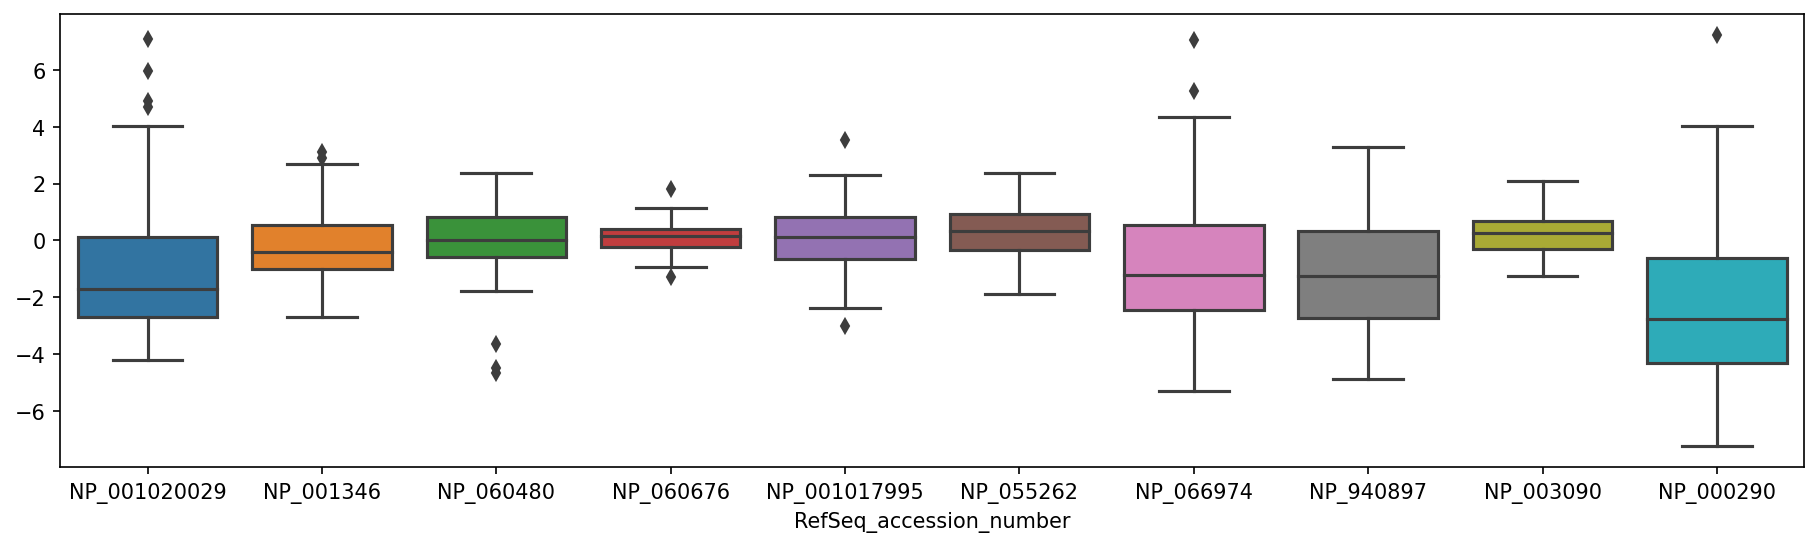

In [26]:
#Running this cell will show you a boxplot for 10 randomly selected proteins. Every time you run it different proteins will appear
data_sample = prt_cln.sample(n=10,axis = 'columns')
plt.figure(figsize = (15,4),dpi = 150)
sns.boxplot(data = data_sample);

# Sample information visualization

In [27]:
sample_info.columns

Index(['Complete TCGA ID', 'Gender', 'Age at Initial Pathologic Diagnosis',
       'ER Status', 'PR Status', 'HER2 Final Status', 'Tumor',
       'Tumor--T1 Coded', 'Node', 'Node-Coded', 'Metastasis',
       'Metastasis-Coded', 'AJCC Stage', 'Converted Stage',
       'Survival Data Form', 'Vital Status', 'Days to Date of Last Contact',
       'Days to date of Death', 'OS event', 'OS Time', 'PAM50 mRNA',
       'SigClust Unsupervised mRNA', 'SigClust Intrinsic mRNA',
       'miRNA Clusters', 'methylation Clusters', 'RPPA Clusters',
       'CN Clusters', 'Integrated Clusters (with PAM50)',
       'Integrated Clusters (no exp)', 'Integrated Clusters (unsup exp)'],
      dtype='object')

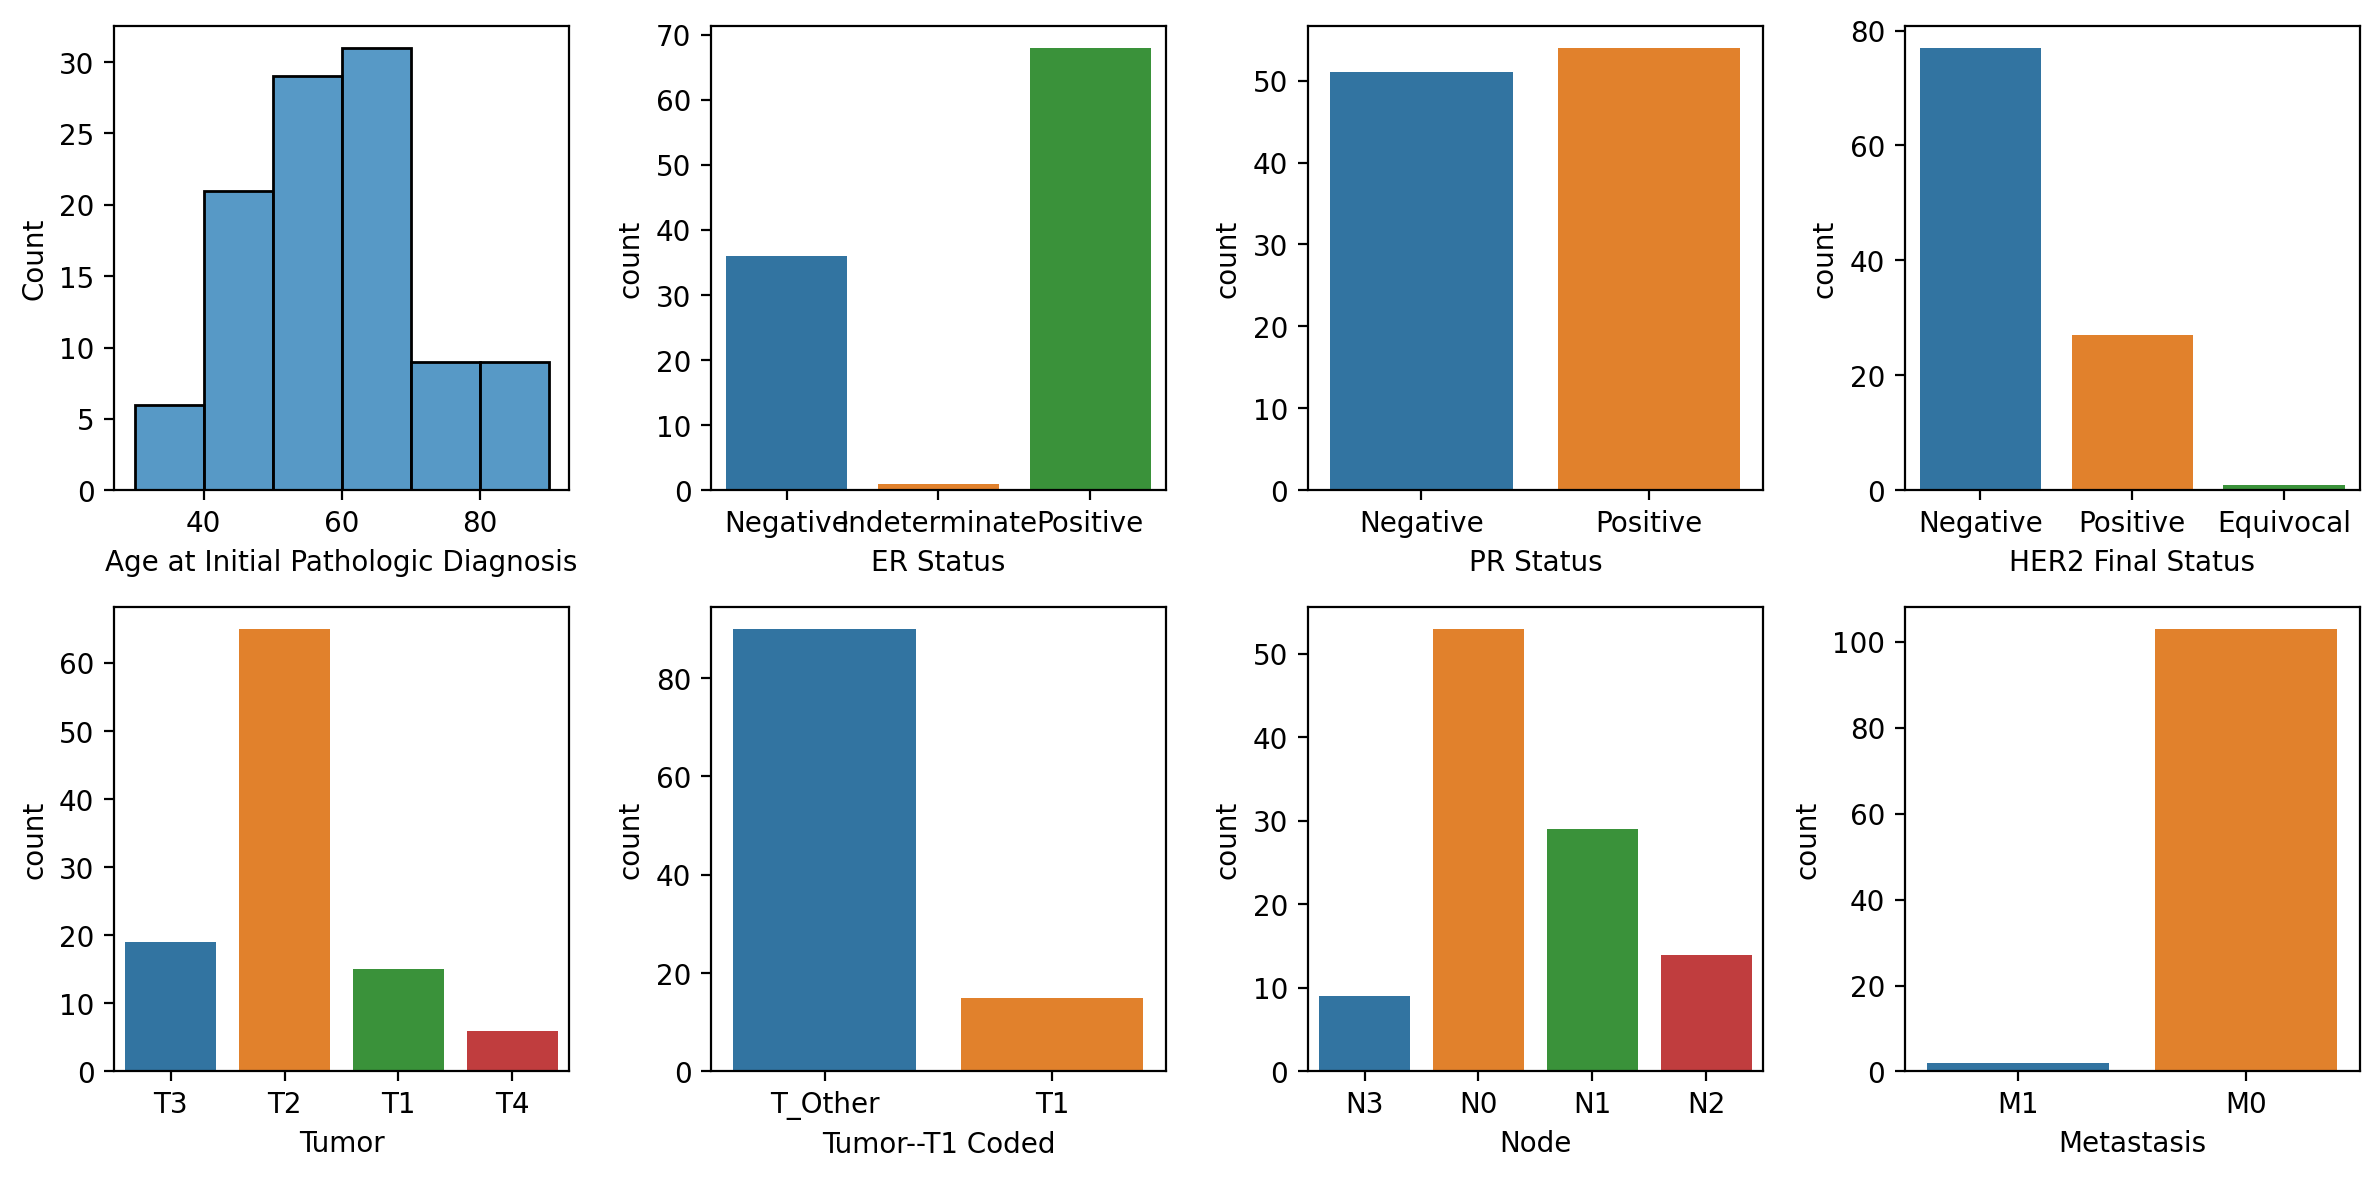

In [28]:
characteristics = pd.Series(['Age at Initial Pathologic Diagnosis',
       'ER Status', 'PR Status', 'HER2 Final Status', 'Tumor',
       'Tumor--T1 Coded', 'Node', 'Metastasis'])

len(characteristics)

#Create distribution plots for each of our characteristics of interest with a for loop
figs,axs = plt.subplots(ncols = 4, nrows = 2,figsize = (12,6),dpi = 200)
i=0
for x in characteristics:
    if (i <= 3) & (x != 'Age at Initial Pathologic Diagnosis'):
        sns.countplot(data = sample_info, x = x, ax = axs[0][i])
    elif (i>3) & (x != 'Age at Initial Pathologic Diagnosis') :
        sns.countplot(data = sample_info, x = x, ax = axs[1][i-4])   
    elif (x == 'Age at Initial Pathologic Diagnosis') & (i <= 3):
        sns.histplot(data = sample_info, x = x, ax = axs[0][i], binwidth = 10) 
    elif (x == 'Age at Initial Pathologic Diagnosis') & (i>3):
        sns.histplot(data = sample_info, x = x, ax = axs[0][i], binwidth = 10) 
    i += 1

plt.tight_layout()


This data illustrates that certain categories have even number of samples, such as PR status, and node-coded. However, others have discrepancies in the sample number. For example, there are 40 more T2 tumor samples compared to any tumor type and many more negative HER2 final status samples. We can explore these graphs when we want to make specific comparisons.

In [29]:
#Creating some columns that we can use later to aggregate certain properties

# First, we are going to create a combined ER, PR, and HER2 status per sample
sample_info['ER-PR-HER2'] = sample_info['ER Status'] + "-" + sample_info['PR Status'] + "-" + sample_info['HER2 Final Status']

sample_info['ER-PR-HER2'].value_counts()
#Now we can see that this combination has 8 unique combinations. 
#However, we should be careful about comparing across this data, especially to the last 3 due to their low sample size.

Positive-Positive-Negative         42
Negative-Negative-Negative         25
Negative-Negative-Positive         11
Positive-Positive-Positive         11
Positive-Negative-Negative         10
Positive-Negative-Positive          4
Indeterminate-Negative-Positive     1
Positive-Positive-Equivocal         1
Name: ER-PR-HER2, dtype: int64

Now we can see that this combination has 8 unique combinations. <br>
However, we should be careful about comparing across this data, especially to the last 3 due to their low sample size.<br>
We will focus our analysis on **Hormone Receptor Status** (i.e. ER status, PR status, and HER2 status)

# Combining Data for Analysis
We now want to add in our Hormone Receptor status information into our protein information.

In [30]:
#Create a database from sample info to merge with our protein data
sample_merge = sample_info[['Complete TCGA ID', 'ER Status', 'PR Status', 'HER2 Final Status','ER-PR-HER2']]

#Merge our sample info
data = sample_merge.merge(data, how = "right", on = 'Complete TCGA ID')

#Fill the sample information for Controls that are not included in the sample table (This is why we chose right.)
data = data.fillna('Control')
data = data.transpose()
data.columns = data.iloc[0]
data = data.drop('Complete TCGA ID')
data.head()

Complete TCGA ID,TCGA-AO-A12D,TCGA-C8-A131,TCGA-AO-A12B,TCGA-BH-A18Q,TCGA-C8-A130,TCGA-C8-A138,TCGA-E2-A154,TCGA-C8-A12L,TCGA-A2-A0EX,TCGA-AO-A12D,...,TCGA-AO-A12B,TCGA-A2-A0SW,TCGA-AO-A0JL,TCGA-BH-A0BV,TCGA-A2-A0YM,TCGA-BH-A0C7,TCGA-A2-A0SX,263d3f-I.CPTAC,blcdb9-I.CPTAC,c4155b-C.CPTAC
ER Status,Negative,Negative,Positive,Negative,Positive,Positive,Positive,Negative,Positive,Negative,...,Positive,Positive,Negative,Positive,Negative,Positive,Negative,Control,Control,Control
PR Status,Negative,Negative,Positive,Negative,Positive,Negative,Positive,Negative,Positive,Negative,...,Positive,Negative,Negative,Positive,Negative,Negative,Negative,Control,Control,Control
HER2 Final Status,Positive,Negative,Negative,Negative,Equivocal,Positive,Negative,Positive,Negative,Positive,...,Negative,Negative,Negative,Negative,Negative,Positive,Negative,Control,Control,Control
ER-PR-HER2,Negative-Negative-Positive,Negative-Negative-Negative,Positive-Positive-Negative,Negative-Negative-Negative,Positive-Positive-Equivocal,Positive-Negative-Positive,Positive-Positive-Negative,Negative-Negative-Positive,Positive-Positive-Negative,Negative-Negative-Positive,...,Positive-Positive-Negative,Positive-Negative-Negative,Negative-Negative-Negative,Positive-Positive-Negative,Negative-Negative-Negative,Positive-Negative-Positive,Negative-Negative-Negative,Control,Control,Control
NP_958782,1.096131,2.609943,-0.659828,0.195341,-0.49406,2.765081,0.862659,1.40757,1.185108,1.100688,...,-0.963904,-0.487772,-0.10668,-0.065838,0.65585,-0.552212,-0.39856,0.598585,-0.191285,0.566975


# Exploratory Data Analysis

For this project, we will primarily investigate proteomics difference between HER2, PR, and ER status. There are many more comparisons we could make, but for the sake of time we will only analyze these comparisons.

## Unsupervised Analysis for Hormone Receptor status
We first want to see how the entire proteome measured differes across hormone receptor status

### Preparing the data

In [31]:
# Creating our Legend Key
# We are going to encode our data from most # of positives to least.
HR_status_dict = {"Positive-Positive-Negative" : 3, "Negative-Negative-Negative" : 8 , "Negative-Negative-Positive" :6 , 
                  "Positive-Positive-Positive" :1 , "Positive-Negative-Negative" : 5 , "Positive-Negative-Positive" : 2,
                  "Indeterminate-Negative-Positive" : 7 , "Positive-Positive-Equivocal" : 4, "Control":9}
HR_status = pd.Series(data.transpose()['ER-PR-HER2']).replace(HR_status_dict).tolist()
ind_status_dict = {"Negative" : 1, "Positive" : 0, "Control" : 2, "Equivocal" : 2}
ER_status = pd.Series(data.transpose()['ER Status']).replace(ind_status_dict).tolist()
PR_status = pd.Series(data.transpose()['PR Status']).replace(ind_status_dict).tolist()
HER2_status = pd.Series(data.transpose()['HER2 Final Status']).replace(ind_status_dict).tolist()

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
scaled_x = scaler.fit_transform(prt_cln)

### Creating PCA model and visualizing PCA

In [35]:
from sklearn.decomposition import PCA

In [36]:
pca_model = PCA(n_components=2)
pc_results = pca_model.fit_transform(scaled_x)

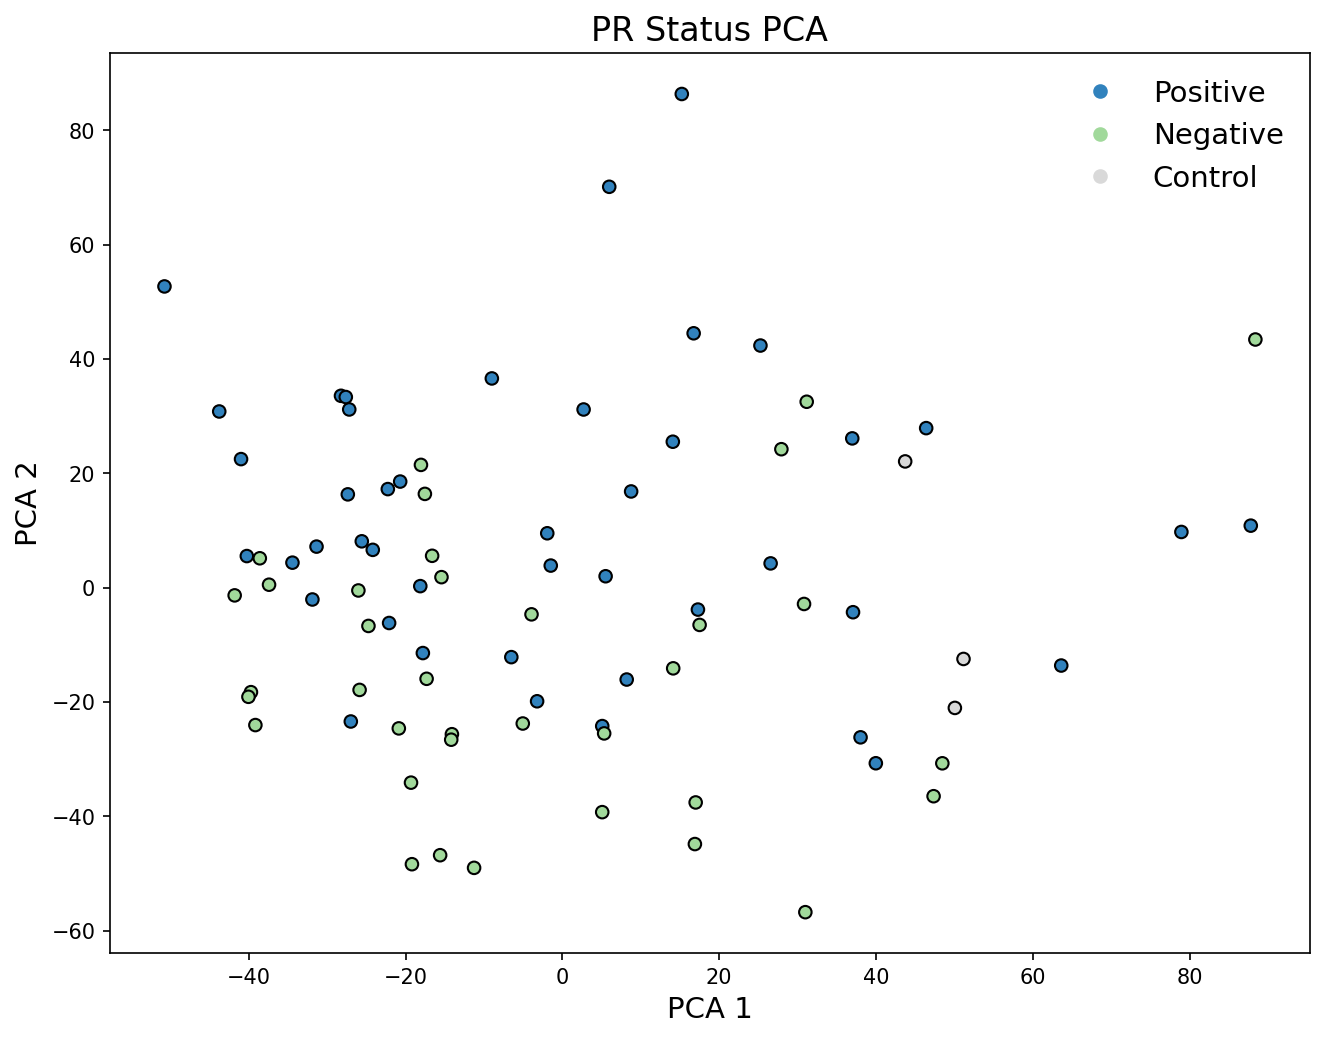

In [37]:
#Setting My Legend
classes = ['Positive','Negative','Control']
#Building My Plot
fig = plt.figure(figsize = (8,6), dpi = 150)
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('PCA 1',fontsize = 14)
ax.set_ylabel('PCA 2',fontsize = 14)
ax.set_title('PR Status PCA',fontsize = 16)
#Plotting the Data
scatter = ax.scatter(pc_results[:,0],pc_results[:,1], c = PR_status,cmap = 'tab20c', edgecolor = 'black')
plt.legend(handles = scatter.legend_elements()[0], labels = classes, frameon = False, fontsize = 14);

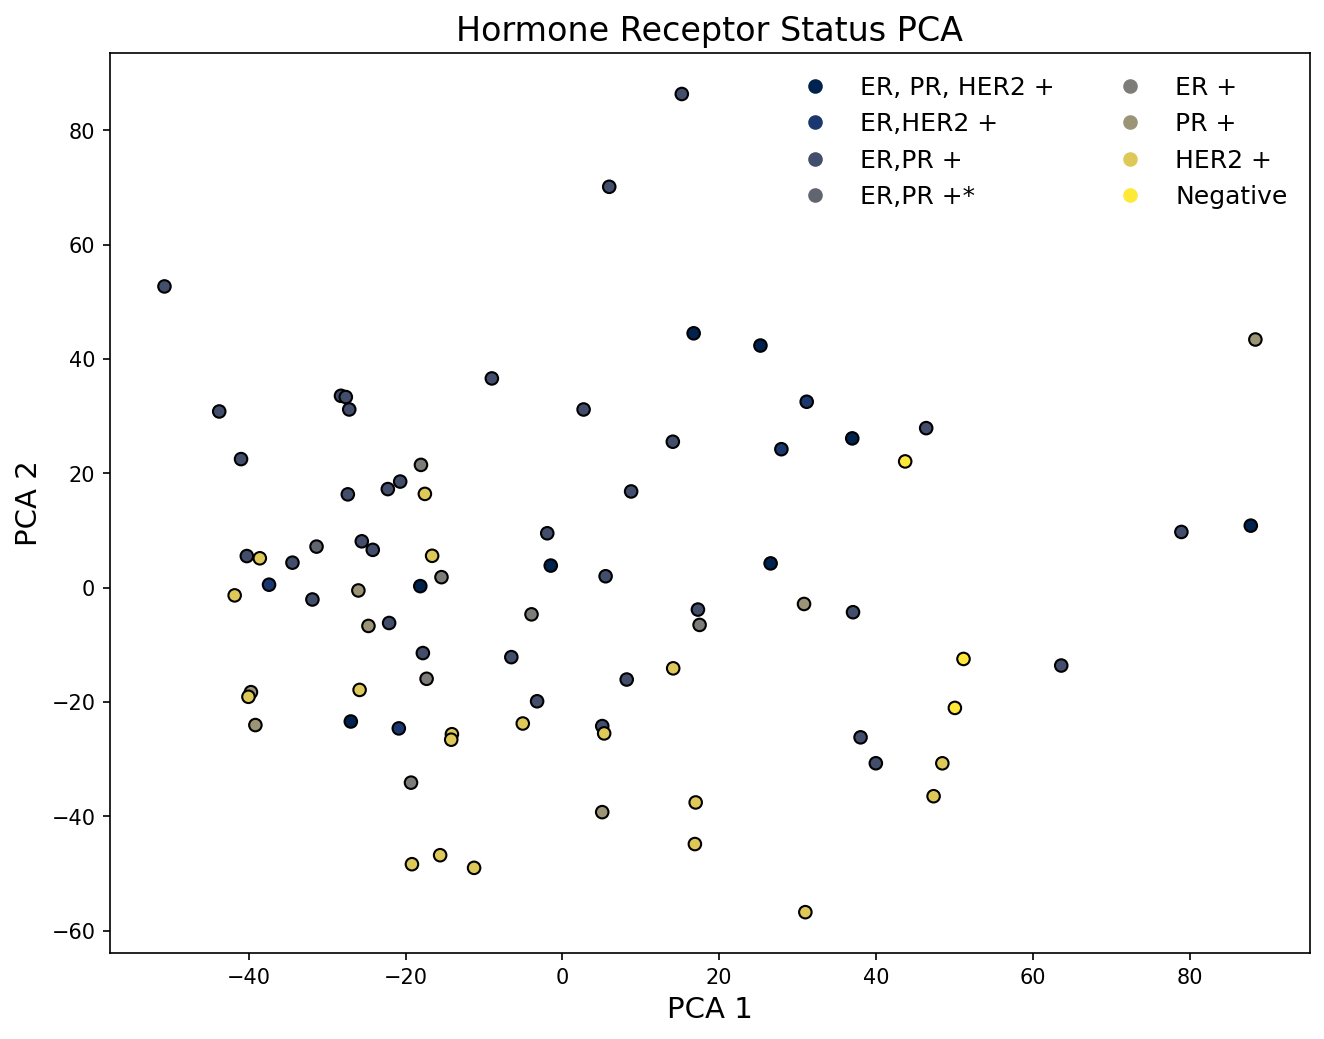

In [38]:
#Setting My Legend
classes = ["ER, PR, HER2 +","ER,HER2 +","ER,PR +","ER,PR +*",
          "ER +","PR +","HER2 +","Negative", "Control"]
#Building My Plot
fig = plt.figure(figsize = (8,6), dpi = 150)
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('PCA 1',fontsize = 14)
ax.set_ylabel('PCA 2',fontsize = 14)
ax.set_title('Hormone Receptor Status PCA',fontsize = 16)
#Plotting the Data
scatter = ax.scatter(pc_results[:,0],pc_results[:,1], c = HR_status,cmap = 'cividis', edgecolor = 'black')
plt.legend(handles = scatter.legend_elements()[0], labels = classes, frameon = False, fontsize = 12, ncol = 2);

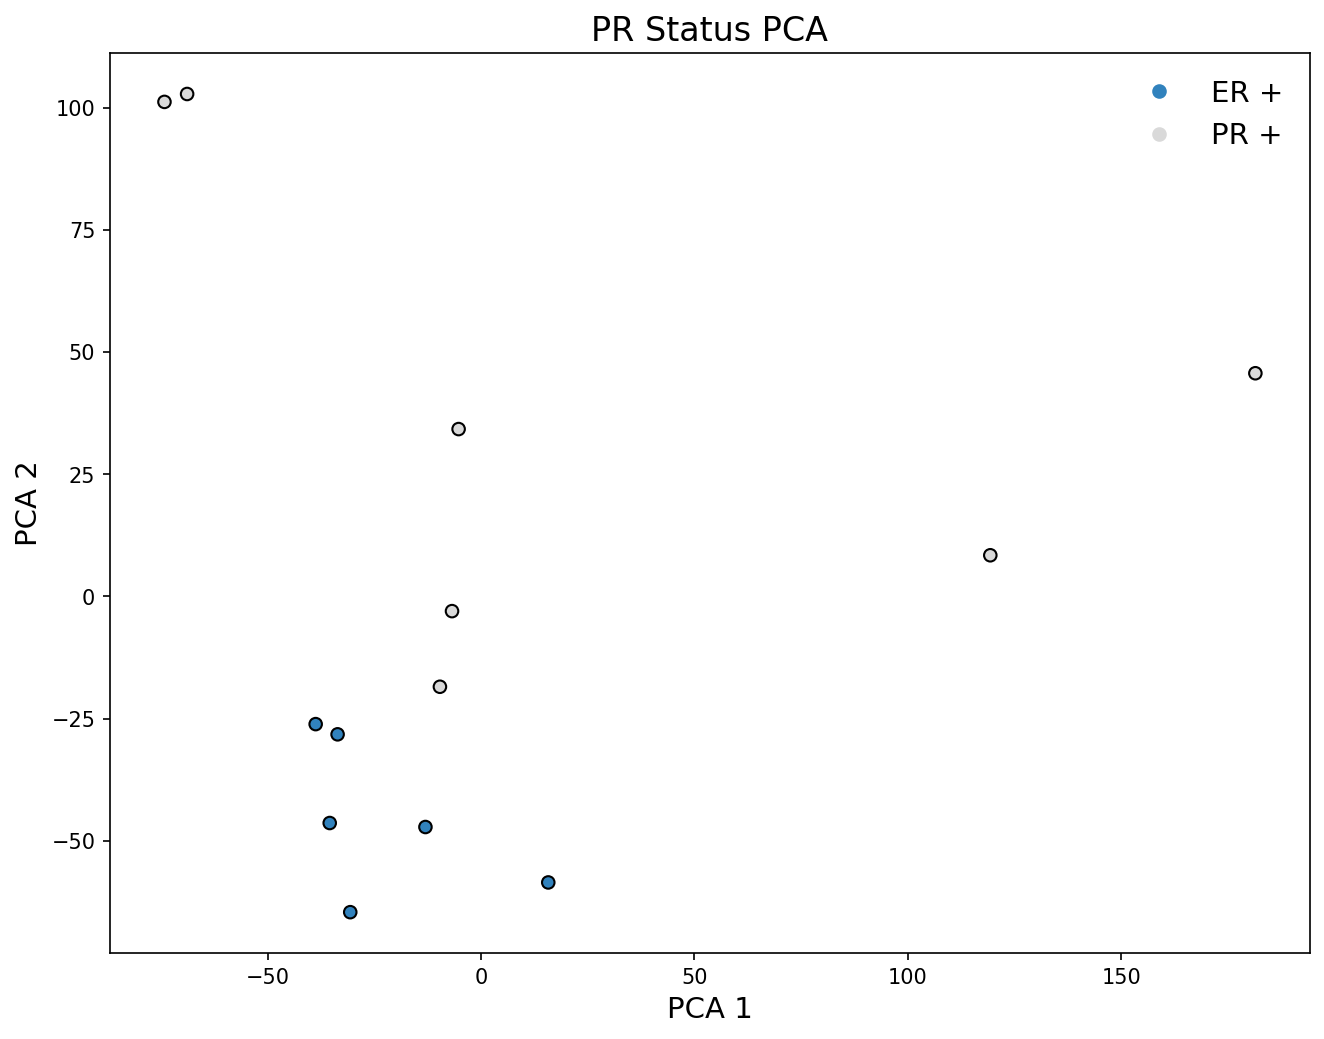

In [39]:
#Create PCA with just singly Hormone receptor positive

#Generating filtered data
single_pos_status = data.transpose()[data.transpose()["ER-PR-HER2"]
                                     .isin(['Negative-Negative-Positive','Negative-Positive-Negative',
                                            'Positive-Negative-Negative'])].drop(['ER Status'],axis = 1).drop(
    ['PR Status'],axis = 1).drop(['HER2 Final Status'],axis = 1)

#Creating new key
single_stat_dict = {'Negative-Negative-Positive':3,'Negative-Positive-Negative':2,'Positive-Negative-Negative':1}
single_color = single_pos_status["ER-PR-HER2"].replace(single_stat_dict)

#Creating PCA Data
scaled_x = scaler.fit_transform(prt_cln)
pca_model = PCA(n_components=2)
pc_results = pca_model.fit_transform(single_pos_status.drop(["ER-PR-HER2"],axis = 1))

#Creating my plot
#Setting My Legend
classes = ['ER +','PR +','HER2 +']
#Building My Plot
fig = plt.figure(figsize = (8,6), dpi = 150)
ax = fig.add_axes([0,0,1,1])
ax.set_xlabel('PCA 1',fontsize = 14)
ax.set_ylabel('PCA 2',fontsize = 14)
ax.set_title('PR Status PCA',fontsize = 16)
#Plotting the Data
scatter = ax.scatter(pc_results[:,0],pc_results[:,1], c = single_color,cmap = 'tab20c', edgecolor = 'black')
plt.legend(handles = scatter.legend_elements()[0], labels = classes, frameon = False, fontsize = 14);

## Pairwise Comparison Analysis: PR Status

We are going to generate comparison data for PR status across the entire proteomic analysis so that we can start determining specific proteins of interest.<br>
For this analysis, we will include all the data points will different characteristics. This means that there will be higher variance in our samples that could be explained by other characteristics, but it is allowing us to increase power through our sample size.

## Generating data for Comparisons

In [40]:
PR_negative = data.transpose()[data.transpose()["PR Status"] == 'Negative'].drop(['ER Status', 'PR Status', 'HER2 Final Status', 'ER-PR-HER2'], axis = 1)
PR_negative.head()

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001004456,NP_848578,NP_997625,NP_003270,NP_078879,NP_057655,NP_653179,NP_699178,NP_006140,NP_068835
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AO-A12D,1.096131,1.11137,1.11137,1.107561,1.11518,1.107561,1.11137,1.11137,-1.51739,0.482754,...,-2.024094,-0.042998,1.637123,-0.252537,-5.475771,1.038984,-1.410716,-0.294445,0.660707,0.54752
TCGA-C8-A131,2.609943,2.650422,2.650422,2.646374,2.646374,2.646374,2.650422,2.650422,3.909313,-1.045294,...,-0.166903,-4.251215,1.059605,2.193011,0.124544,0.658864,0.156927,1.205328,0.660707,0.274316
TCGA-BH-A18Q,0.195341,0.215413,0.215413,0.205377,0.215413,0.215413,0.215413,0.215413,-1.03576,-0.517226,...,2.353112,3.467124,0.422827,0.389373,0.513152,0.10167,-1.116049,1.292626,-1.554294,-0.002037
TCGA-C8-A138,2.765081,2.779709,2.779709,2.797995,2.787023,2.779709,2.783366,2.783366,2.205538,0.749997,...,0.197769,1.931253,-2.354914,-0.354459,0.216055,-1.356515,-0.186231,0.36234,0.808511,0.099026
TCGA-C8-A12L,1.40757,1.40757,1.410312,1.40757,1.413053,1.40757,1.410312,1.413053,3.19507,-0.007077,...,1.91476,-0.983074,0.763303,0.415124,5.426704,2.029905,-1.106445,2.696106,-0.281234,2.071029


In [41]:
PR_positive = data.transpose()[data.transpose()["PR Status"] == 'Positive'].drop(['ER Status', 'PR Status', 'HER2 Final Status', 'ER-PR-HER2'], axis = 1)
PR_positive.head()

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001004456,NP_848578,NP_997625,NP_003270,NP_078879,NP_057655,NP_653179,NP_699178,NP_006140,NP_068835
Complete TCGA ID,,,,,,,,,,,,,,,,,,,,,
TCGA-AO-A12B,-0.659828,-0.648742,-0.654285,-0.632113,-0.640428,-0.654285,-0.648742,-0.648742,-0.618256,1.222003,...,-3.07101,0.396103,1.64881,-2.813263,-7.350166,-0.000217,-0.332794,-2.580459,0.660707,4.023963
TCGA-C8-A130,-0.49406,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,-1.445222,-1.284508,0.493181,2.369266,-0.100475,0.450543,-0.815487,-0.933562,2.753011,1.165554
TCGA-E2-A154,0.862659,0.870186,0.870186,0.866423,0.870186,0.870186,0.870186,0.870186,1.920171,2.349197,...,4.618518,0.576642,0.636856,-0.488396,0.625566,2.349197,0.840079,1.40835,2.168554,-1.165806
TCGA-A2-A0EX,1.185108,1.192612,1.18886,1.185108,1.200116,1.18886,1.18886,1.192612,1.046289,2.138081,...,3.158587,-0.401929,2.948483,2.025525,0.682359,1.789158,-0.559507,1.901714,4.708105,-0.330644
TCGA-AN-A04A,0.384588,0.371393,0.371393,0.37799,0.374692,0.37799,0.374692,0.374692,-0.24217,0.051417,...,-0.426898,-1.030565,2.78276,-9.656729,-1.370334,0.3516,-0.463184,0.638589,0.43077,1.958079


## Performing T-Test comparison

In [42]:
#Importing scipy to perform t-test anaysis
from scipy import stats

In [43]:
#Performing a t-test and creating a table of protein and p-value
PR_ttest = pd.DataFrame(dtype = 'object')
for x in PR_positive.columns:
    ttest = pd.DataFrame([[x,pd.Series(stats.ttest_ind(PR_positive[x].astype(float),PR_negative[x].astype(float),axis = 0))[1]]])
    PR_ttest = pd.concat([PR_ttest,ttest],ignore_index = True)
PR_ttest.columns = ['Protein','p-value']
PR_ttest.head()

,Protein,p-value
0,NP_958782,0.597804
1,NP_958785,0.597541
2,NP_958786,0.594231
3,NP_000436,0.606475
4,NP_958781,0.608768


Now that we have p-values, we want to calculate our false discovery rate (FDR) corrected p-value (q-value).<br>

The reason we need FDR correction is because we have now performed 9449 t-tests. If we are using a confidence level of 95%, then this means that we should expect a false positive rate of 5%. This would lead to **472 false positives**.<br>

Using a FDR correction, we can limit our false positives, but this can cause a higher amount of false negatives. Therefore, we will use both p-values and FDR corrected p-values in different ways to understand our data.

In [44]:
#Performing FDR correction
from statsmodels.stats.multitest import fdrcorrection

rejected, q = fdrcorrection(PR_ttest['p-value'])
q

array([0.78063169, 0.78061232, 0.7786558 , ..., 0.29691899, 0.86803672,
       0.8886943 ])

In [45]:
#Adding FDR corrected p-values to our t-test table
PR_ttest['q-value'] = pd.Series(q)
PR_ttest.head()

,Protein,p-value,q-value
0,NP_958782,0.597804,0.780632
1,NP_958785,0.597541,0.780612
2,NP_958786,0.594231,0.778656
3,NP_000436,0.606475,0.786519
4,NP_958781,0.608768,0.787764


In [46]:
#Sorting our proteins by significance
PR_ttest.sort_values('p-value').head()

,Protein,p-value,q-value
2485,NP_004302,6.016444e-13,5.684938e-09
2393,NP_000917,2.128771e-10,9.922061e-07
259,NP_065871,3.150194e-10,9.922061e-07
1948,NP_079408,8.276815e-10,1.955191e-06
1942,NP_001190181,1.254222e-09,2.370229e-06


Filter proteins by a p-value < 0.05 and q-value < 0.1

In [47]:
#Filtering proteins by p < 0.05
psig = PR_ttest[PR_ttest['p-value'] < 0.05]
psig.head()

,Protein,p-value,q-value
9,NP_001611,0.000465,0.009899
10,NP_076965,0.031853,0.135090
11,NP_001367,0.028908,0.126753
13,NP_001138241,0.033288,0.138380
15,NP_002464,0.019885,0.101948


This illustrates that we have 2659 proteins that are significant by their p-value between PR positive and PR negative sampels.

In [48]:
#Filtering proteins by q < 0.1
qsig = PR_ttest[PR_ttest['q-value'] < 0.1]
qsig.head()

,Protein,p-value,q-value
9,NP_001611,0.000465,0.009899
17,NP_061198,0.006453,0.053346
25,NP_036467,0.004668,0.043802
26,NP_004989,0.000408,0.009177
28,NP_149043,0.003203,0.034554


On the other hand, we have 1824 that are significant by the fdr adjusted p-value. We could further investigate these individual proteins to understand their roll in PR positive breast cancer.<br>

### Volcano Plots

We want to visualize our protein changes 

In [49]:
#Calculating the mean and standard deviation for PR status
PR_mean = data.transpose().groupby('PR Status').mean()
PR_std = data.drop(['ER Status','HER2 Final Status','ER-PR-HER2']).transpose().groupby('PR Status').std()
PR_mean

C:\Users\btosm\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  exec(code_obj, self.user_global_ns, self.user_ns)


,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001004456,NP_848578,NP_997625,NP_003270,NP_078879,NP_057655,NP_653179,NP_699178,NP_006140,NP_068835
PR Status,,,,,,,,,,,,,,,,,,,,,
Control,0.324758,0.333827,0.331573,0.331573,0.337887,0.333827,0.331573,0.331573,-0.382624,2.453594,...,0.771869,-0.292421,-0.762624,-2.380551,5.507378,-2.290867,-0.119336,-0.407810,1.492421,-1.876604
Negative,0.385352,0.392213,0.392372,0.387249,0.390281,0.390878,0.390680,0.390757,-0.282394,-0.232240,...,0.607918,-0.890370,-0.111086,0.408310,1.340362,-1.144534,-0.343503,0.460922,0.731921,0.221980
Positive,0.266643,0.273018,0.272118,0.271137,0.274639,0.273023,0.272551,0.272636,-0.322840,0.886442,...,0.177358,0.394535,0.537422,-0.176201,0.513226,-0.257797,0.064074,-0.142673,0.545733,0.130234


In [50]:
# Calculating Fold Change
PR_mean_t = PR_mean.transpose()
p = PR_mean_t['Positive']
n = PR_mean_t['Negative']
PR_mean_t['Fold Change'] = p - n
PR_mean_t.head()

PR Status,Control,Negative,Positive,Fold Change
NP_958782,0.324758,0.385352,0.266643,-0.118709
NP_958785,0.333827,0.392213,0.273018,-0.119195
NP_958786,0.331573,0.392372,0.272118,-0.120255
NP_000436,0.331573,0.387249,0.271137,-0.116112
NP_958781,0.337887,0.390281,0.274639,-0.115641


In [51]:
#Creating a table to generate our volcano plots
PR_volcano = pd.DataFrame(PR_mean_t.merge(PR_ttest,how = 'inner',left_index = True, right_on = 'Protein'))
PR_volcano = PR_volcano.loc[:,['Protein','Fold Change','p-value']]
PR_volcano['log p'] = np.log(PR_volcano['p-value'])*-1

PR_volcano.head()

,Protein,Fold Change,p-value,log p
0,NP_958782,-0.118709,0.597804,0.514492
1,NP_958785,-0.119195,0.597541,0.514932
2,NP_958786,-0.120255,0.594231,0.520487
3,NP_000436,-0.116112,0.606475,0.500092
4,NP_958781,-0.115641,0.608768,0.496317


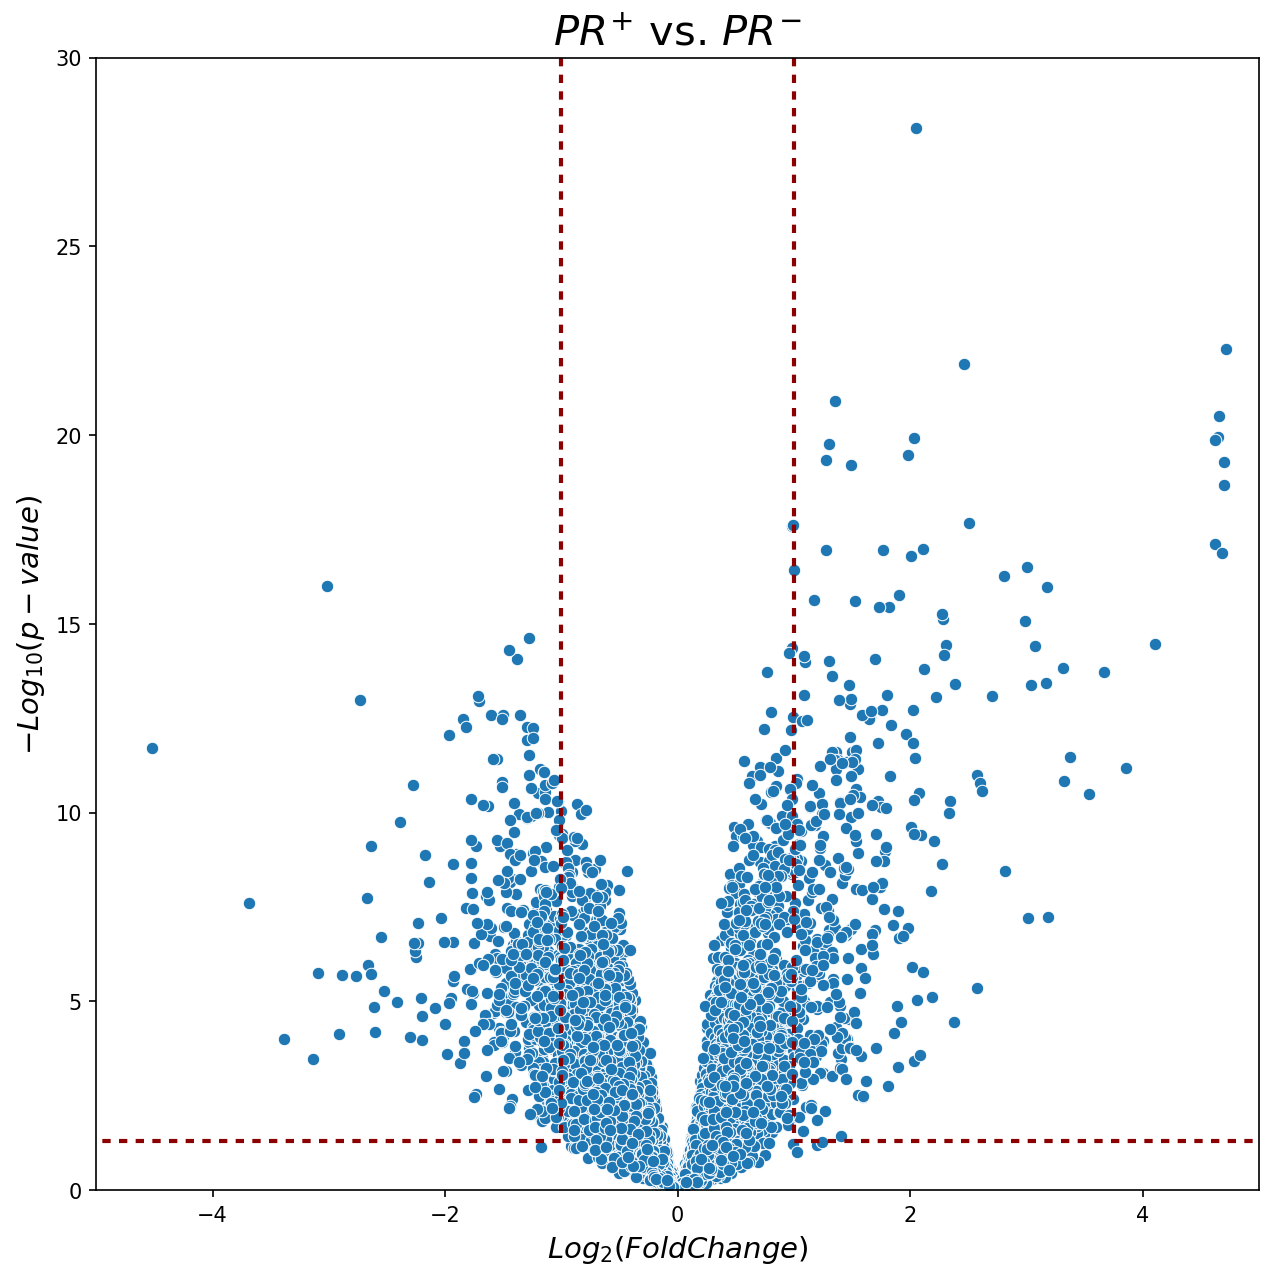

In [52]:
#Visualizing our volcano plot
plt.figure(figsize = (10,10),dpi = 150)
sns.scatterplot(data = PR_volcano, x = 'Fold Change', y = 'log p')
plt.plot([-1, -1, -5], [30, 1.3, 1.3], lw=2,dashes = [2,2],color = 'darkred')
plt.plot([1, 1, 5], [30, 1.3, 1.3], lw=2,dashes = [2,2],color = 'darkred')
plt.xlabel('$Log_{2}(Fold Change)$', fontsize = 14)
plt.ylabel('$-Log_{10}(p-value)$', fontsize = 14)
plt.ylim(0,30)
plt.xlim(-5,5)
plt.title('$PR^{+}$ vs. $PR^{-}$', fontsize = 20);



## Enrichment Analysis

Enrichment analysis takes in a list of genes and investigates which pathways have a higher number of genes in the list than would happen by random chance.<br>

This can give us a good idea of what could be occuring biologically quickly.<br>

In enrichment anaysis, we will use our significant proteins. If we just analyzed all our proteins, we would actually be determining if our method enriches certain pathways, not the biological changes.

## Installing and importing GSEApy

In [53]:
pip install GSEApy

Note: you may need to restart the kernel to use updated packages.


In [54]:
import gseapy as gp

### P-value significant values

#### Create Series of gene symbols

In [55]:
#Generating a simple series of the protein symbols that are significant by p-value
Gene_data = prt_data.loc[:,['RefSeq_accession_number', 'gene_symbol']]
psig_gene = psig.merge(Gene_data,how = "inner",left_on = 'Protein', right_on = 'RefSeq_accession_number')
psig_gene = psig_gene['gene_symbol'].dropna()
psig_gene

0          AHNAK
1          AHNAK
2        DYNC1H1
4           MYH9
5          MYO5C
          ...   
2653     GRAMD1C
2655       CHRNE
2656      RNF150
2657     SLC27A5
2658    C20ORF79
Name: gene_symbol, Length: 2304, dtype: object

#### Performing Enrichment Analysis

In [56]:
#Pulling data from GSEA for enrichment analysis
names = gp.get_library_name() #The default is human
names[:10]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021']

In [57]:
#Performing enrichment analysis
p_enr = gp.enrichr(gene_list = psig_gene,
                gene_sets = ['KEGG_2016','KEGG_2013'],
                organism = 'Human',
                no_plot = False,
                cutoff = 0.1)

In [58]:
#Previewing results
p_enr.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2016,Complement and coagulation cascades Homo sapie...,33/79,1.003342e-12,2.849491e-10,0,0,6.058878,167.392775,C1QB;ITGAM;CFH;PROS1;SERPINE1;ITGB2;C4BPA;PLAT...
1,KEGG_2016,Metabolic pathways Homo sapiens hsa01100,210/1239,4.241964e-12,6.023589e-10,0,0,1.777686,46.550482,CDA;AHCYL2;AHCYL1;UXS1;ATP5C1;ABAT;ENO1;GLS;NS...
2,KEGG_2016,Protein processing in endoplasmic reticulum Ho...,48/169,1.427554e-10,1.351417e-08,0,0,3.360155,76.174348,VCP;TRAM1;ERO1LB;RPN2;PRKCSH;RPN1;DERL1;RRBP1;...
3,KEGG_2016,Tight junction Homo sapiens hsa04530,42/139,2.418722e-10,1.611352e-08,0,0,3.662062,81.087614,SRC;PPP2R2A;F11R;MYL12A;MYL12B;PPP2CA;PPP2CB;P...
4,KEGG_2016,Endocytosis Homo sapiens hsa04144,63/259,2.836887e-10,1.611352e-08,0,0,2.730674,60.028800,WIPF1;CBLB;WASL;PSD4;SH3GLB2;USP8;PDCD6IP;VPS3...


This shows that there are 463 proteins that are enriched from proteins that are significant by p-value.

#### Visualizing enrichment analysis

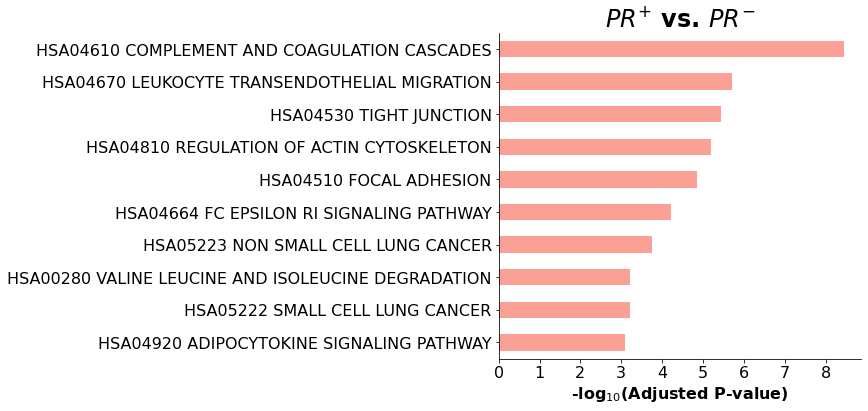

In [59]:
#Creating a barplot of results
from gseapy.plot import barplot, dotplot
barplot(p_enr.res2d,title='$PR^{+}$ vs. $PR^{-}$',)

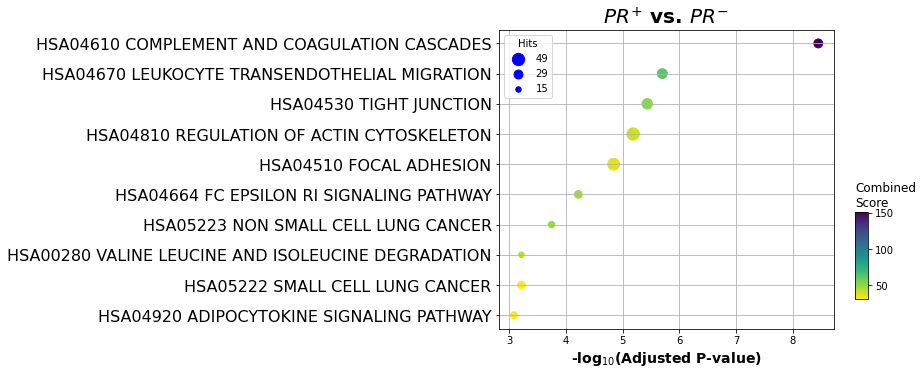

In [60]:
# Creating a dotplot of results
dotplot(p_enr.res2d, title='$PR^{+}$ vs. $PR^{-}$',cmap='viridis_r');

Unsurprisingly, many of the affected pathways are related to cancer pathways, signaling pathways, and amino acid synthesis, which are all known to be affected in cancerious cells.

### Q-value significant values

This analysis will likely yeild less enriched proteins, but we would result in the most significantly affected proteins, because all of these proteins are significant through FDR correction

#### Create Series of gene symbols

In [61]:
#Generatiing a list of q significant gene symbols by q value
Gene_data = prt_data.loc[:,['RefSeq_accession_number', 'gene_symbol']]
qsig_gene = qsig.merge(Gene_data,how = "inner",left_on = 'Protein', right_on = 'RefSeq_accession_number')
qsig_gene = qsig_gene['gene_symbol'].dropna()
qsig_gene

0          AHNAK
1          MYO5C
2          MYO1F
3          MYO1E
4          MYO1G
          ...   
1820      ELOVL1
1821     GRAMD1C
1822      RNF150
1823     SLC27A5
1824    C20ORF79
Name: gene_symbol, Length: 1592, dtype: object

#### Performing Enrichment Analysis

In [62]:
#Pulling data from GSEA
names = gp.get_library_name() #The default is human
names[:10]

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021']

In [63]:
#Performing enrichment analysis
q_enr = gp.enrichr(gene_list = qsig_gene,
                gene_sets = ['KEGG_2016','KEGG_2013'],
                organism = 'Human',
                no_plot = False,
                cutoff = 0.1)

In [64]:
#Previewing enrichment analysis results
q_enr.results.head()

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2016,Protein processing in endoplasmic reticulum Ho...,42/169,1.898988e-12,5.298177e-10,0,0,4.220494,113.909875,VCP;ERO1LB;RPN2;PRKCSH;RPN1;DERL1;RRBP1;ERO1L;...
1,KEGG_2016,Metabolic pathways Homo sapiens hsa01100,154/1239,8.227281e-11,1.147706e-08,0,0,1.861715,43.230850,AHCYL2;AHCYL1;UXS1;MPI;CCBL2;ATP5C1;ABAT;GLS;N...
2,KEGG_2016,Complement and coagulation cascades Homo sapie...,24/79,1.349991e-09,1.255492e-07,0,0,5.521690,112.770398,FGB;FGA;ITGAM;VWF;CFH;F10;SERPIND1;PROS1;SERPI...
3,KEGG_2016,Endocytosis Homo sapiens hsa04144,47/259,8.831989e-09,6.160313e-07,0,0,2.826033,52.408466,TSG101;SRC;AGAP2;NEDD4L;CBLB;WASL;EGFR;SNX1;PA...
4,KEGG_2016,Thyroid hormone signaling pathway Homo sapiens...,27/118,1.066817e-07,5.952840e-06,0,0,3.754845,60.278096,GSK3B;SRC;HDAC1;SLC2A1;ATP1A4;PIK3CD;ATP2A2;GA...


This shows that there are 463 proteins that are enriched from proteins that are significant by p-value.

#### Visualizing enrichment analysis

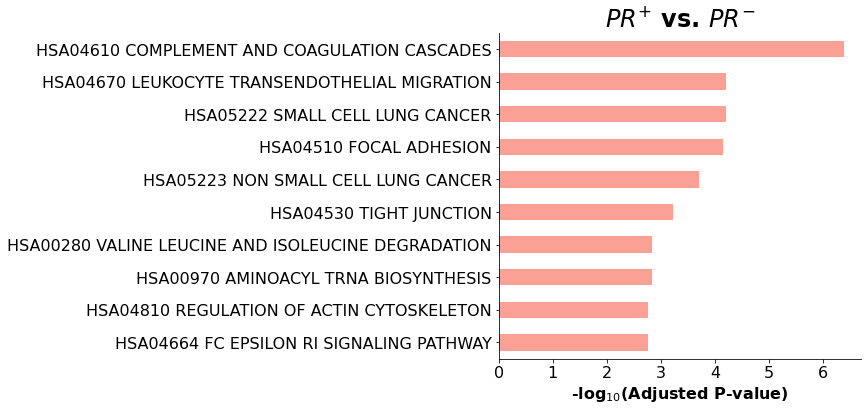

In [65]:
#Generating a bar plot of top enriched pathways
from gseapy.plot import barplot, dotplot
barplot(q_enr.res2d,title='$PR^{+}$ vs. $PR^{-}$')

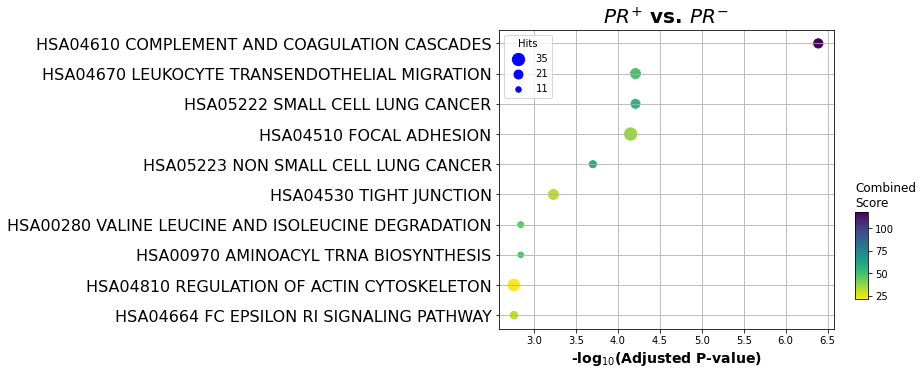

In [66]:
#Generating a dot plot of top enriched pathways
dotplot(q_enr.res2d, title='$PR^{+}$ vs. $PR^{-}$',cmap='viridis_r');

Interestingly, we find similar pathways in both the p-value and q-value analysis.

# THANK YOU

Thank you for viewing my portfolio project. This project illustrates a subset of my skills that can benefit your company.<br>
<br>
You can learn more about my skills, background, and experience in my resume.<br>

https://github.com/alanalrister/portfolio/blob/8241238103e4ba9cc5cfe3c639f372424bd52798/Resume_Rister.pdf<br>

Please do not hesitate to email me at alanalrister@gmail.com if my skills are a good fit for you.